In [1]:
import matplotlib.pyplot as plt
import numpy as np


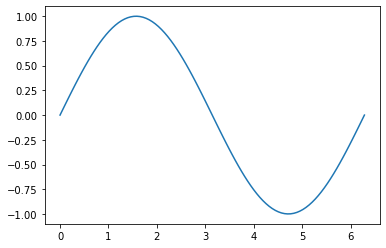

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()

In [6]:
%matplotlib notebook

In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


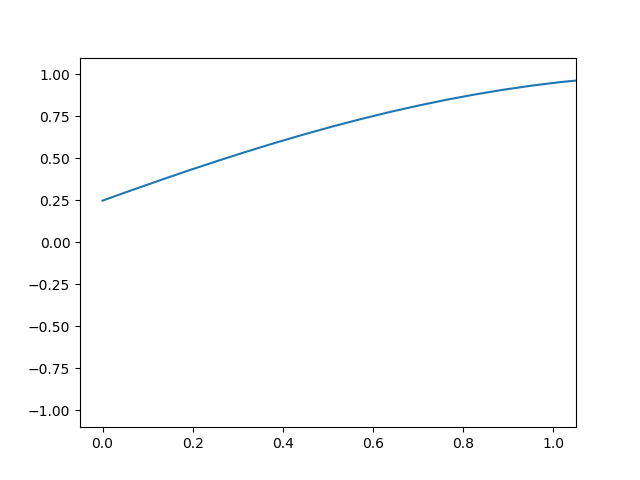

In [12]:
fig, ax = plt.subplots()
line, = ax.plot([])     
# A tuple unpacking to unpack the only plotax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()

In [1]:
# pip install altair vega_datasets

In [7]:
import altair as alt
import pandas as pd
data = pd.DataFrame({'col-1': list('CCCDDDEEE'),
                     'col-2': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
chart = alt.Chart(data)
alt.Chart(data).mark_point().encode(
    x='col-1',
    y='col-2'
).interactive()

alt.Chart(...)

In [8]:
from vega_datasets import data
cars = data.cars()

brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
).add_selection(
    brush
)



alt.Chart(...)

In [9]:
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)

alt.Chart(...)

In [10]:
alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
)

alt.Chart(...)

In [12]:
points = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)
bars = alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)
points & bars

alt.VConcatChart(...)

# New animation from here 

In [20]:
import pandas as pd
import altair as alt
full_clean_data = pd.read_csv('covid_19_clean_complete_06_Apr_2020.csv', parse_dates=['Date'])



In [21]:
#For selected countries
countries = ['US', 'Italy', 'China', 'Spain', 'France', 'Iran', 'United Kingdom', 'Switzerland']
selected_data = full_clean_data[full_clean_data['Country/Region'].isin(countries)]

In [22]:
selected_data

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
36,36,2020-01-22,China,548,17,28,503,0,0,0
60,60,2020-01-22,France,0,0,0,0,0,0,0
79,79,2020-01-22,Iran,0,0,0,0,0,0,0
83,83,2020-01-22,Italy,0,0,0,0,0,0,0
154,154,2020-01-22,Spain,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13733,13733,2020-04-06,Italy,132547,16523,22837,93187,3599,636,1022
13804,13804,2020-04-06,Spain,136675,13341,40437,82897,5029,700,2357
13809,13809,2020-04-06,Switzerland,21657,765,8056,12836,557,50,1641
13819,13819,2020-04-06,US,366614,10783,19581,336250,29542,1164,2133


In [34]:
alt.Chart(selected_data).mark_circle().encode(
    x='Date',
    y='Country/Region',
    color='Country/Region',
    size='New cases:Q'
).properties(
    width=728,
    height=300,
)

alt.Chart(...)

In [38]:
alt.Chart(selected_data).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
)

alt.Chart(...)

In [39]:
interval = alt.selection_interval()

In [40]:
alt.Chart(selected_data).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=1000,
    height=300,
    selection=interval
)

alt.Chart(...)

In [41]:
alt.Chart(selected_data).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color=alt.condition(interval, 'Country/Region', alt.value('lightgray')),
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=1000,
    height=300,
    selection=interval
)

alt.Chart(...)

In [43]:
alt.Chart(selected_data).mark_bar().encode(
    y='Country/Region',
    color='Country/Region',
    x='sum(New cases):Q'
).properties(
    height=300,
    width=728,
)

alt.Chart(...)

In [48]:
interval = alt.selection_interval()
circle = alt.Chart(selected_data).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color=alt.condition(interval, 'Country/Region', alt.value('lightgray')),
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 3000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=1000,
    height=300,
    selection=interval
)
bars = alt.Chart(selected_data).mark_bar().encode(
    y='Country/Region',
    color='Country/Region',
    x='sum(New cases):Q'
).properties(
    height=300,
    width=728,
).transform_filter(
    interval
)
circle & bars

alt.VConcatChart(...)